# Assignment 3

In [2]:
## Import modules first
import pandas as pd
import matplotlib.pyplot as plot
from datetime import datetime

%matplotlib inline

#import csv file and load it into a dataframe
data_file = 'data/atlantic.csv'
data = pd.read_csv(data_file)

### How does the data look like?

There are 49105 rows of data. Each row has 22 columns.

In [4]:
#get a statistcal summary of the data
data.describe().round(2)

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,49105.00,49105.00,49105.00,49105.00,49105.00,49105.00,49105.00,49105.00,49105.00,49105.00,49105.00,49105.00,49105.00,49105.00,49105.00,49105.00
mean,19498020.10,910.13,52.01,-251.41,-868.67,-869.32,-872.68,-871.41,-875.57,-875.77,-876.68,-876.32,-877.56,-877.66,-877.92,-877.79
std,446185.05,671.04,27.68,964.31,353.30,351.55,342.15,345.63,333.65,333.13,330.53,331.54,328.03,327.77,327.02,327.41
min,18510625.00,0.00,-99.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
25%,19111101.00,600.00,35.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
50%,19560927.00,1200.00,45.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
75%,19890810.00,1800.00,70.00,990.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
max,20151113.00,2330.00,165.00,1024.00,710.00,600.00,640.00,530.00,360.00,300.00,330.00,360.00,180.00,250.00,150.00,180.00


In [5]:
#check how the first 10 records of the data dataframe look like
data.head(10)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,AL011851,UNNAMED,18510626,0,,HU,28.2N,97.0W,70,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,AL011851,UNNAMED,18510626,600,,TS,28.3N,97.6W,60,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
7,AL011851,UNNAMED,18510626,1200,,TS,28.4N,98.3W,60,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
8,AL011851,UNNAMED,18510626,1800,,TS,28.6N,98.9W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
9,AL011851,UNNAMED,18510627,0,,TS,29.0N,99.4W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [6]:
# which rows are null for any of the columns?
data[data.isna().any(axis=1)]

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW


In [7]:
# since the explanatory notes of the dataset says that "-999" is used as a placeholder value for fields that have no data.
# Let's see how many rows have '-999' in any one of the columns.
data[(data == -999).any(axis=1)]

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47043,AL082011,HARVEY,20110820,1730,L,TS,17.0N,88.3W,55,995,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
47057,AL092011,IRENE,20110821,2300,L,TS,17.8N,64.6W,60,993,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
47059,AL092011,IRENE,20110822,525,L,TS,18.1N,65.8W,60,990,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
47070,AL092011,IRENE,20110824,1600,L,HU,22.4N,74.0W,100,955,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [8]:
# show the rows that don't have '-999'
data[~(data == -999).any(axis=1)]

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
43104,AL012004,ALEX,20040731,1800,,TD,30.3N,78.3W,25,1010,...,0,0,0,0,0,0,0,0,0,0
43105,AL012004,ALEX,20040801,0,,TD,31.0N,78.8W,25,1009,...,0,0,0,0,0,0,0,0,0,0
43106,AL012004,ALEX,20040801,600,,TD,31.5N,79.0W,25,1009,...,0,0,0,0,0,0,0,0,0,0
43107,AL012004,ALEX,20040801,1200,,TD,31.6N,79.1W,30,1009,...,0,0,0,0,0,0,0,0,0,0
43108,AL012004,ALEX,20040801,1800,,TS,31.6N,79.2W,35,1009,...,50,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,AL122015,KATE,20151112,1200,,EX,41.3N,50.4W,55,981,...,180,120,120,120,60,0,0,0,0,0
49101,AL122015,KATE,20151112,1800,,EX,41.9N,49.9W,55,983,...,180,120,120,120,60,0,0,0,0,0
49102,AL122015,KATE,20151113,0,,EX,41.5N,49.2W,50,985,...,200,220,120,120,60,0,0,0,0,0
49103,AL122015,KATE,20151113,600,,EX,40.8N,47.5W,45,985,...,180,220,0,0,0,0,0,0,0,0


#### Create some graphs!

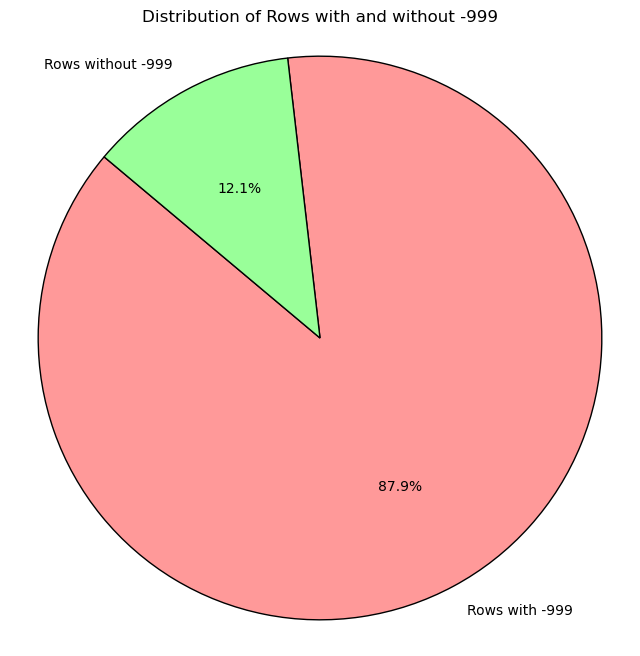

In [10]:
# The use of '-999' as a placeholder value has great ramifications as to future data cleaning.
# It's useful to see how much of the data is littered with -999. The results will be shown in a pie chart.

# Identify rows with any -999
has_negative_999 = (data == -999).any(axis=1)

# Count rows with and without -999
counts = has_negative_999.value_counts()

# Prepare data for the pie chart
labels = ['Rows with -999', 'Rows without -999']
sizes = [counts[True] if True in counts else 0, counts[False] if False in counts else 0]
colors = ['#FF9999', '#99FF99']

# Create pie chart
plot.figure(figsize=(8, 8))
plot.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plot.title('Distribution of Rows with and without -999')
plot.axis('equal')  # Equal aspect ratio to make the pie circular
plot.show()

In [11]:
# Although there are 49105 rows of data. It doesn't mean that there were 49105 storms on record.
# We can count how many storms are recorded based on 'ID'.
print ("There are " + str(data['ID'].nunique()) + " storms in the dataset.")

There are 1814 storms in the dataset.


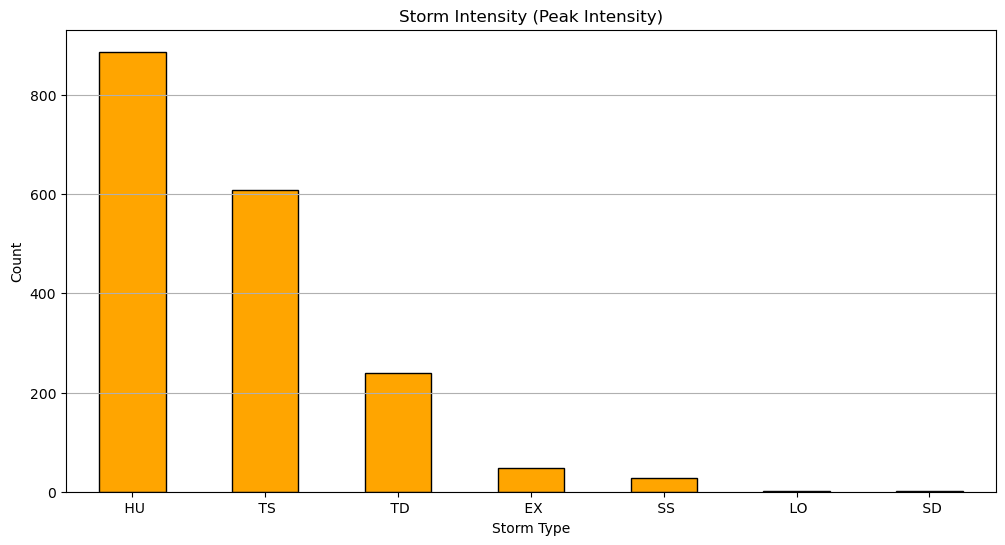

In [12]:
# We can look at the peak intensity of the 1814 storms.
# Peak intensity is defined by the highest maximum wind speed recorded for the storm.

# Get the row where "Maximum Wind" is highest for each unique "ID"
filtered_data = data.loc[data.groupby("ID")["Maximum Wind"].idxmax()]

# Count occurrences of "Status" in the filtered dataset
status_counts = filtered_data["Status"].value_counts()

# Plot the counts
plot.figure(figsize=(12, 6))
status_counts.plot(kind='bar', color='orange', edgecolor="black")
plot.title("Storm Intensity (Peak Intensity)")
plot.xlabel("Storm Type")
plot.ylabel("Count")
plot.grid(axis='y')
plot.xticks(rotation=0)
plot.show()


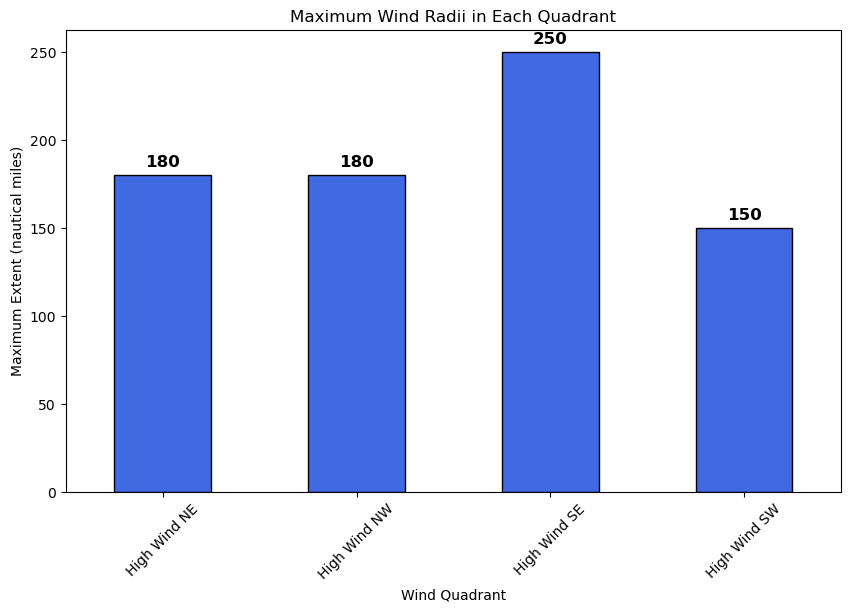

In [27]:
# 12 attributes in the data are dedicated to record how strong the wind is from the eye.
# 3 thresholds are established for each quadrant, i.e. the Northeast, Northwest, Southeast and Southwest.
# The thresholds are, 34 kts - low, 50 kts - moderate, 64 kts - high.
# The number represents how many nautical miles from the eye did the wind reach the threshold.
# The plot below looks at the high winds, and identify the largest number in the attribute.

# Find the maximum value for each wind quadrant
max_values = data[['High Wind NE', 'High Wind NW', 'High Wind SE', 'High Wind SW']].max()

# Create the bar chart
plot.figure(figsize=(10, 6))
max_values.plot(kind='bar', color='royalblue', edgecolor='black')

# Labels and title
plot.xlabel("Wind Quadrant")
plot.ylabel("Maximum Extent (nautical miles)")
plot.title("Maximum Wind Radii in Each Quadrant")
plot.xticks(rotation=45)

# Show the values on top of bars
for i, v in enumerate(max_values):
    plot.text(i, v + 5, str(v), ha='center', fontsize=12, fontweight='bold')

# Display the chart
plot.show()

#### What does the dataset tell you?

This dataset records historical cyclone data from the Atlantic Basin between 1851 and 2014. It contains 49,105 records with 22 columns, capturing details of individual storm observations. Here’s what you need to know:
##### Key Columns and Their Meanings:
*ID*: A unique identifier for each storm (e.g., "AL011851" represents the first storm of 1851).

*Name*: The name of the cyclone (many older storms are unnamed).

*Date & Time*: When the observation was recorded (format: YYYYMMDD for date, HHMM for time).

*Event*: A marker for specific storm events (e.g., landfall).

*Status*: The storm classification (e.g., HU = Hurricane, TS = Tropical Storm).

*Latitude & Longitude*: The storm's location at the recorded time.

*Maximum Wind*: The highest recorded wind speed in knots.

*Minimum Pressure*: The lowest atmospheric pressure recorded in millibars (negative values like "-999" indicate missing data).

*Wind Radius*: The extent of wind speeds (low, moderate, and high) in different quadrants (NE, SE, SW, NW).

##### What You Can Learn from This Dataset:
How storms track across the Atlantic over time.

Changes in cyclone frequency and intensity over the years.

Geographic areas most affected by strong storms.